# Data loading / Overview: 看項目種類、是否缺失

In [2]:
import numpy as np
import pandas as pd

filepath = '/Users/mac/Desktop/Kaggle_datasets/20170824_Titanic/'
filename1 = 'train.csv'
filename2 = 'test.csv'

dfTrain = pd.read_csv(filepath + filename1)
dfTest = pd.read_csv(filepath + filename2)

In [3]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
#使用id當index也方便之後區分train和test data
dfTrain.set_index(['PassengerId'],inplace=True)
dfTest.set_index(['PassengerId'],inplace=True)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Pclass

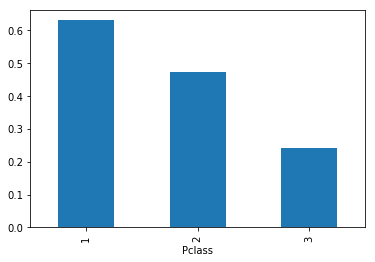

In [7]:
#這招必學超屌！！ x欄位grouby對應y軸的數學計算，一氣呵成！！
dfTrain.groupby('Pclass').Survived.mean().plot(kind='bar')

In [15]:
dfTrain.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<Container object of 3 artists>

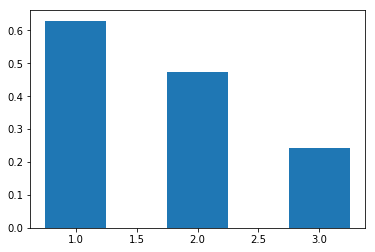

In [16]:
plt.bar([1,2,3], dfTrain.groupby('Pclass').Survived.mean(), width = 0.5) 
#自己熟悉的畫法，但是你的group會很痛苦

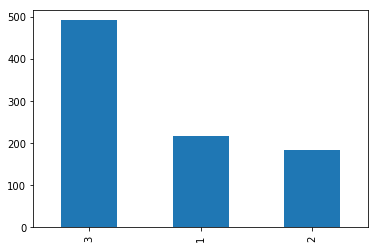

In [17]:
dfTrain['Pclass'].value_counts().plot(kind='bar') #學起來了，太屌啦!!

Scikit-learn的DecisionTreeClassifier運作方式：<br/> 
設定X_train,標準答案y-->再設定X_test, 跑模型 DecisionTreeClassifier().fit(X_train,y) <br/>
結果用 DecisionTreeClassifier().predict(X_test) 顯示

In [13]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

X_train = dfTrain[['Pclass']]
y = dfTrain['Survived']
X_test = dfTest[['Pclass']]

dtree.fit(X_train,y)
prediction = dtree.predict(X_test)

dfPrediction = pd.DataFrame(data=prediction, index = dfTest.index.values, columns=['Survived'])
contentTestPredObject1 = dfPrediction.to_csv()
#print(contentTestPredObject1)

In [20]:
dfPrediction.head()

,Survived
892,0
893,0
894,0
895,0
896,0


# Sex

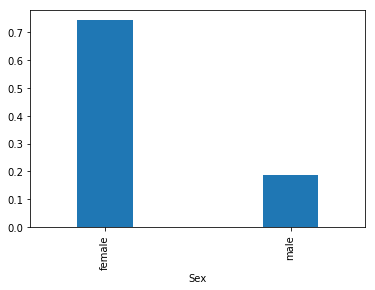

In [22]:
dfTrain.groupby('Sex').Survived.mean().plot(kind='bar', width = 0.3)

seaborn初體驗

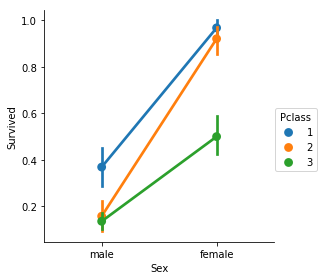

In [23]:
import seaborn as sns
sns.factorplot("Sex", "Survived", hue="Pclass", data=dfTrain) #hue可以加入第三個factor，超帥！！

In [24]:
#學習連接方法concat往下補，然後把male/female變成int
dfFull = pd.concat([dfTrain,dfTest])
dfFull['Sex'] = dfFull['Sex'].map({'male': 0, 'female': 1}).astype(int)
dfTrain = dfFull.loc[1:891,:]
dfTest = dfFull.loc[892:,:]

In [25]:
dtree = DecisionTreeClassifier()

X_train = dfTrain[['Pclass','Sex']]
y = dfTrain['Survived']
X_test = dfTest[['Pclass','Sex']]

dtree.fit(X_train,y)
prediction = dtree.predict(X_test)

dfPrediction = pd.DataFrame(data=prediction,index = dfTest.index.values,columns=['Survived'])
contentTestPredObject1 = dfPrediction.to_csv()
#print(contentTestPredObject1)

In [26]:
dfPrediction.head()

,Survived
892,0.0
893,0.0
894,0.0
895,0.0
896,0.0


# PARCH

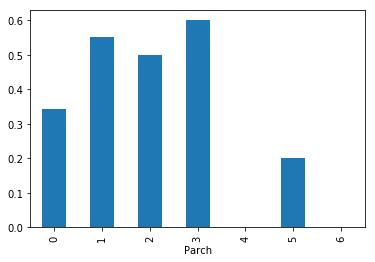

In [27]:
dfTrain.groupby('Parch').Survived.mean().plot(kind='bar')

In [28]:
dfFull.Parch.value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [31]:
dfFull['ParchCat'] = dfFull.Parch.copy().astype(int) #先複製一次原本的欄位創建新欄位
dfFull.loc[dfFull.Parch > 2,'ParchCat'] = 3 #把大於3的都分成一類，數量多才可以有統計意義
dfTrain = dfFull.loc[1:891,:]
dfTest = dfFull.loc[892:,:]

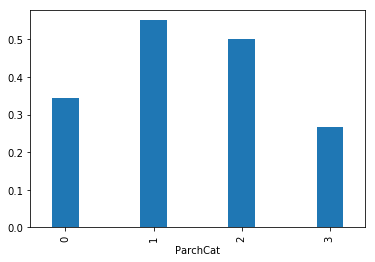

In [32]:
dfTrain.groupby('ParchCat').Survived.mean().plot(kind='bar', width=0.3)

# SibSp

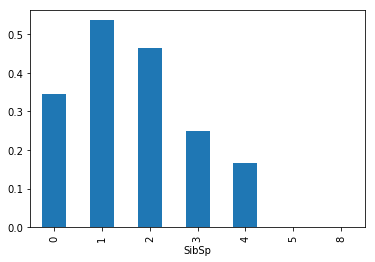

In [33]:
dfTrain.groupby('SibSp').Survived.mean().plot(kind='bar')

In [34]:
dfFull['SibSpCat'] = dfFull.SibSp.copy().astype(int)
dfFull.loc[dfFull.SibSp > 2,'SibSpCat'] = 3
dfTrain = dfFull.loc[1:891,:]
dfTest = dfFull.loc[892:,:]

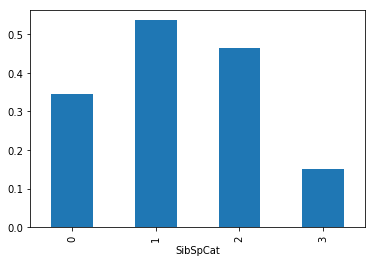

In [36]:
dfTrain.groupby('SibSpCat').Survived.mean().plot(kind='bar')

In [37]:
dtree = DecisionTreeClassifier()

X_train = dfTrain[['Pclass','Sex','ParchCat','SibSpCat']]
y = dfTrain['Survived']
X_test = dfTest[['Pclass','Sex','ParchCat','SibSpCat']]

dtree.fit(X_train,y)
prediction = dtree.predict(X_test)

dfPrediction = pd.DataFrame(data=prediction,index = dfTest.index.values,columns=['Survived'])
contentTestPredObject1 = dfPrediction.to_csv()
#print(contentTestPredObject1) #結果不好

# Embarked

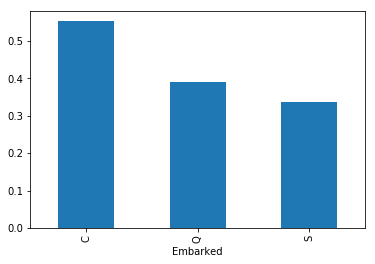

In [38]:
dfTrain.groupby('Embarked').Survived.mean().plot(kind='bar')

In [40]:
#竟然可以雙變數分析+統計數量一次到位！！
dfFull.groupby(['Embarked','Sex']).Name.count()

Embarked  Sex
C         0      157
          1      113
Q         0       63
          1       60
S         0      623
          1      291
Name: Name, dtype: int64

In [41]:
dfFull.groupby(['Embarked','Pclass']).Name.count()

Embarked  Pclass
C         1         141
          2          28
          3         101
Q         1           3
          2           7
          3         113
S         1         177
          2         242
          3         495
Name: Name, dtype: int64

# fill N/A

In [42]:
dfFull[dfFull.Embarked.isnull()] #直接以null index列出那些人

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,ParchCat,SibSpCat
PassengerId,,,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,1,0,1.0,113572,0,0
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,1,0,1.0,113572,0,0


In [45]:
indexEmbarked = dfFull[dfFull.Embarked.isnull()].index.tolist() #取得null的index，變成list

#利用相似乘客特性預測他們的embark port!!
for indEmb in indexEmbarked:
    fareEmbarked = dfFull.loc[indEmb].Fare.mean()
    predictedEmbarked = dfFull[(dfFull.Fare < fareEmbarked*1.1) &
                               (dfFull.Fare > fareEmbarked*0.9) &
                               (dfFull.Pclass == dfFull.loc[indEmb].Pclass)].Embarked.mode()
    dfFull.loc[indEmb,'Embarked'] = predictedEmbarked[0]
    print(predictedEmbarked)   

0    C
dtype: object
0    C
dtype: object


In [61]:
dfFull.loc[[62,630]]  #都填滿了

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,ParchCat,SibSpCat
PassengerId,,,,,,,,,,,,,
62,38.0,B28,2,80.0000,"Icard, Miss. Amelie",0,1,1,0,1.0,113572,0,0
630,NaN,NaN,1,7.7333,"O'Connell, Mr. Patrick D",0,3,0,0,0.0,334912,0,0


In [51]:
dfFull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 13 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null int64
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null int64
SibSp       1309 non-null int64
Survived    891 non-null float64
Ticket      1309 non-null object
ParchCat    1309 non-null int64
SibSpCat    1309 non-null int64
dtypes: float64(3), int64(7), object(3)
memory usage: 143.2+ KB


In [54]:
#然後把str變成int
dfFull['Embarked'] = dfFull['Embarked'].map({'S': 0, 'Q': 1, 'C': 2}).astype(int)
dfTrain = dfFull.loc[1:891,:]
dfTest = dfFull.loc[892:,:]

ValueError: Cannot convert NA to integer

In [55]:
dtree = DecisionTreeClassifier()

X_train = dfTrain[['Pclass','Sex','ParchCat','Embarked']]
y = dfTrain['Survived']
X_test = dfTest[['Pclass','Sex','ParchCat','Embarked']]

dtree.fit(X_train,y)
prediction = dtree.predict(X_test)

dfPrediction = pd.DataFrame(data=prediction,index = dfTest.index.values,columns=['Survived'])
contentTestPredObject1 = dfPrediction.to_csv()
#print(contentTestPredObject1)

# FARE

In [56]:
nullFares = dfFull[dfFull.Fare.isnull()].index.values
dfFull.loc[nullFares]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,ParchCat,SibSpCat
PassengerId,,,,,,,,,,,,,
1044,60.5,NaN,0,NaN,"Storey, Mr. Thomas",0,3,0,0,NaN,3701,0,0


In [57]:
#利用相似乘客特性預測他的fare
dfFull.loc[nullFares,'Fare']
dfFull.loc[nullFares,'Fare'] = dfFull[(dfFull.ParchCat == 0) & 
                                      (dfFull.Pclass ==3 ) & 
                                      (dfFull.Embarked == 0)].Fare.mean()
dfFull.loc[[1044]]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,ParchCat,SibSpCat
PassengerId,,,,,,,,,,,,,
1044,60.5,NaN,0,10.118203,"Storey, Mr. Thomas",0,3,0,0,NaN,3701,0,0


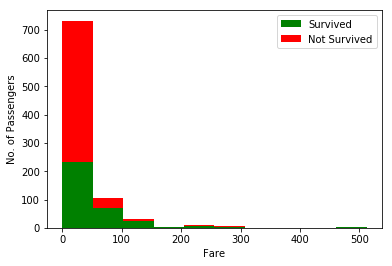

In [50]:
import matplotlib.pyplot as plt

plt.hist([dfTrain[dfTrain['Survived']==1]['Fare'], 
          dfTrain[dfTrain['Survived']==0]['Fare']], 
          stacked = True, #使他們可以疊在一起 
          color = ['g','r'],
          bins = 10,
          label = ['Survived','Not Survived'])
plt.legend()
plt.ylabel('No. of Passengers')
plt.xlabel('Fare')

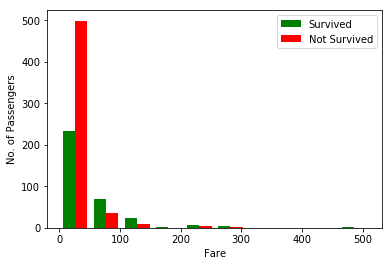

In [62]:
plt.hist([dfTrain[dfTrain['Survived']==1]['Fare'], 
          dfTrain[dfTrain['Survived']==0]['Fare']], 
          stacked = False, #使他們不疊在一起 
          color = ['g','r'],
          bins = 10,
          label = ['Survived','Not Survived'])
plt.legend()
plt.ylabel('No. of Passengers')
plt.xlabel('Fare')

In [63]:
#Fare大於平均都當1，小於平均都當0，統計數量Fare（把連續數據變成二元）
fareMean = dfFull.Fare.mean()
dfFull.loc[dfFull.Fare <= fareMean,'Fare']=0
dfFull.loc[dfFull.Fare > fareMean,'Fare']=1
dfFull.Fare.value_counts()

0.0    1005
1.0     304
Name: Fare, dtype: int64

In [64]:
dtree = DecisionTreeClassifier()
X_train = dfTrain[['Pclass','Sex','ParchCat','Embarked','Fare']]
y = dfTrain['Survived']
X_test = dfTest[['Pclass','Sex','ParchCat','Embarked','Fare']]
dtree.fit(X_train,y)
prediction = dtree.predict(X_test)
dfPrediction = pd.DataFrame(data=prediction,index = dfTest.index.values,columns=['Survived'])
contentTestPredObject1 = dfPrediction.to_csv()
#print(contentTestPredObject1)

# CABIN：化腐朽為神奇

In [65]:
dfFull.Cabin.value_counts(dropna=False) #雜亂無章

NaN                1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F2                    4
C22 C26               4
F4                    4
F33                   4
C78                   4
D                     4
B96 B98               4
A34                   3
B58 B60               3
E34                   3
B51 B53 B55           3
C101                  3
E101                  3
D26                   2
C124                  2
B71                   2
E24                   2
C126                  2
C89                   2
B5                    2
E25                   2
C106                  2
C31                   2
C86                   2
D21                   2
C68                   2
                   ... 
A5                    1
B73                   1
C45                   1
A18                   1
T                     1
B11                   1
C99                   1
E49                   1
C118                  1
E12                   1
A26             

In [66]:
#使用第一個字母分類
dfFull.Cabin.str[0].value_counts(dropna=False)

NaN    1014
C        94
B        65
D        46
E        41
A        22
F        21
G         5
T         1
Name: Cabin, dtype: int64

In [69]:
#把NA還有少量的GT都變成Z
#然後把str變成int
dfFull['CabinCat'] = dfFull.Cabin.str[0].fillna('Z')
dfFull.loc[dfFull.CabinCat=='G','CabinCat']= 'Z'
dfFull.loc[dfFull.CabinCat=='T','CabinCat']= 'Z'
dfFull['CabinCat'] = dfFull['CabinCat'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'Z': 6}).astype(int)
dfTrain = dfFull.loc[1:891,:]
dfTest = dfFull.loc[892:,:]

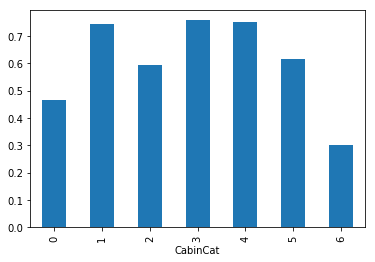

In [70]:
dfTrain.groupby('CabinCat').Survived.mean().plot(kind='bar')

In [71]:
dtree = DecisionTreeClassifier()
X_train = dfTrain[['Pclass','Sex','ParchCat','Embarked','Fare','CabinCat']]
X_train = pd.get_dummies(X_train)
y = dfTrain['Survived']
X_test = dfTest[['Pclass','Sex','ParchCat','Embarked','Fare','CabinCat']]
X_test = pd.get_dummies(X_test)
dtree.fit(X_train,y)
prediction = dtree.predict(X_test)
dfPrediction = pd.DataFrame(data=prediction,index = dfTest.index.values,columns=['Survived'])
contentTestPredObject1 = dfPrediction.to_csv()
#print(contentTestPredObject1)

# NAME

In [72]:
#只取頭銜，使用regex
dfFull['Title'] = dfFull.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
dfFull.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Major         2
Mlle          2
Sir           1
Countess      1
Mme           1
Capt          1
Dona          1
Don           1
Jonkheer      1
Lady          1
Name: Title, dtype: int64

In [73]:
#把小分類全部都變成一群，給予數字標號
dfFull['TitleCat']=dfFull['Title']
dfFull.TitleCat.replace(to_replace=['Rev','Dr','Col','Major','Mlle','Ms','Countess','Capt', \
                                    'Dona','Don','Sir','Lady','Jonkheer','Mme'], value=0, inplace=True)
dfFull.TitleCat.replace('Mr',1,inplace=True)
dfFull.TitleCat.replace('Miss',2,inplace=True)
dfFull.TitleCat.replace('Mrs',3,inplace=True)
dfFull.TitleCat.replace('Master',4,inplace=True)                                            
dfFull.TitleCat.value_counts(dropna=False)

1    757
2    260
3    197
4     61
0     34
Name: TitleCat, dtype: int64

In [74]:
#尋找頭銜和其他的相關係數
dfFull.corr().TitleCat

Age        -0.247335
Embarked    0.048032
Fare        0.144555
Parch       0.376653
Pclass     -0.029138
Sex         0.614430
SibSp       0.311873
Survived    0.451099
ParchCat    0.432494
SibSpCat    0.354165
CabinCat   -0.039876
TitleCat    1.000000
Name: TitleCat, dtype: float64

In [76]:
dfTrain = dfFull.loc[1:891,:]
dfTest = dfFull.loc[892:,:]

dtree = DecisionTreeClassifier()

X_train = dfFull[dfFull.TitleCat!=0][['Sex','ParchCat','SibSpCat']]
y = dfFull[dfFull.TitleCat!=0]['TitleCat']
X_test = dfFull[dfFull.TitleCat==0][['Sex','ParchCat','SibSpCat']]

dtree.fit(X_train,y)
prediction = dtree.predict(X_test)

dfPrediction = pd.DataFrame(data=prediction,index = X_test.index.values,columns=['TitleCat'])
#print(dfPrediction)

In [77]:
dfFull.TitleCat
dfFull.update(dfPrediction)

In [78]:
dfFull.loc[dfPrediction.index,['TitleCat','Title','Sex','SibSpCat','ParchCat']]

,TitleCat,Title,Sex,SibSpCat,ParchCat
31,1.0,Don,0,0,0
150,1.0,Rev,0,0,0
151,1.0,Rev,0,0,0
246,1.0,Dr,0,2,0
250,1.0,Rev,0,1,0
318,1.0,Dr,0,0,0
370,2.0,Mme,1,0,0
399,1.0,Dr,0,0,0
444,2.0,Ms,1,0,0
450,1.0,Major,0,0,0


In [79]:
dfTrain = dfFull.loc[1:891,:]
dfTest = dfFull.loc[892:,:]

dtree = DecisionTreeClassifier()

X_train = dfTrain[['Pclass','Sex','ParchCat','Embarked','Fare','TitleCat']]
y = dfTrain['Survived']
X_test = dfTest[['Pclass','Sex','ParchCat','Embarked','Fare','TitleCat']]

dtree.fit(X_train,y)
prediction = dtree.predict(X_test)

dfPrediction = pd.DataFrame(data=prediction,index = dfTest.index.values,columns=['Survived'])
contentTestPredObject1 = dfPrediction.to_csv()
#print(contentTestPredObject1)

# AGE

In [80]:
dfFull['Age'] = dfFull.Age.round()

In [81]:
dfFull.corr().Age #因為age缺失很多，所以要用已有資料去類比

Age         1.000000
Embarked    0.086174
Fare        0.188894
Parch      -0.150728
Pclass     -0.408663
Sex        -0.063328
SibSp      -0.243578
Survived   -0.076834
ParchCat   -0.195703
SibSpCat   -0.224450
CabinCat   -0.314719
TitleCat   -0.224259
Name: Age, dtype: float64

In [82]:
X_train = dfFull[dfFull.Age.notnull()][['Pclass','SibSp','CabinCat','TitleCat']]
X_test = dfFull[dfFull.Age.isnull()][['Pclass','SibSp','CabinCat','TitleCat']]

y = dfFull.Age.dropna()

In [84]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y)
prediction = dtree.predict(X_test)

agePrediction = pd.DataFrame(data=prediction,index=X_test.index.values,columns=['Age'])

dfFull = dfFull.combine_first(agePrediction) #可以把兩個data合併，把null填起來

In [85]:
dfFull.Age.isnull().sum()

0

In [86]:
dfFull['ageBins'] = pd.cut(dfFull['Age'],list(range(0,80,5))) #幹超屌的直接pf.cut切出新欄位的分層！！

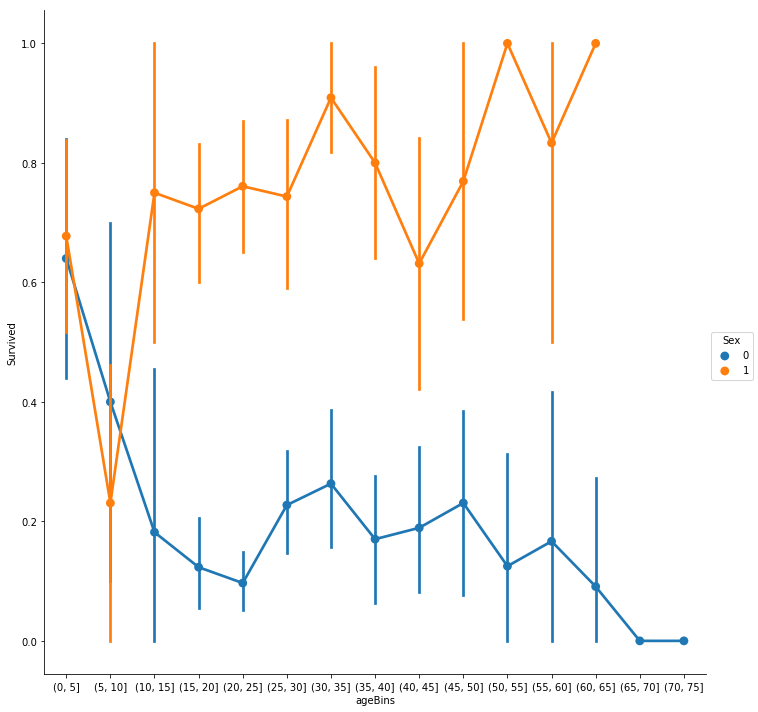

In [88]:
sns.factorplot("ageBins", "Survived", hue="Sex", data=dfFull.loc[1:891,:],size=10)

In [89]:
dfFull.loc[1:891,:].groupby(['Sex','ageBins']).Name.count()

Sex  ageBins 
0    (0, 5]       25
     (5, 10]      10
     (10, 15]     11
     (15, 20]     73
     (20, 25]    155
     (25, 30]     88
     (30, 35]     57
     (35, 40]     47
     (40, 45]     37
     (45, 50]     26
     (50, 55]     16
     (55, 60]     12
     (60, 65]     11
     (65, 70]      4
     (70, 75]      3
1    (0, 5]       31
     (5, 10]      13
     (10, 15]     12
     (15, 20]     65
     (20, 25]     46
     (25, 30]     39
     (30, 35]     33
     (35, 40]     25
     (40, 45]     19
     (45, 50]     13
     (50, 55]      8
     (55, 60]      6
     (60, 65]      4
Name: Name, dtype: int64

In [90]:
dfFull.loc[dfFull.Age <11,'Age'] = 0
dfFull.loc[(dfFull.Age >=10),'Age'] = 1
dfFull.Age.value_counts()

1.0    1200
0.0     109
Name: Age, dtype: int64

In [91]:
dfTrain = dfFull.loc[1:891,:]
dfTest = dfFull.loc[892:,:]

dtree = DecisionTreeClassifier()

X_train = dfTrain[['Pclass','Sex','ParchCat','Embarked','Fare','TitleCat','Age']]
y = dfTrain['Survived']
X_test = dfTest[['Pclass','Sex','ParchCat','Embarked','Fare','TitleCat','Age']]

dtree.fit(X_train,y)
prediction = dtree.predict(X_test)

dfPrediction = pd.DataFrame(data=prediction,index = dfTest.index.values,columns=['Survived'])
contentTestPredObject1 = dfPrediction.to_csv()
#print(contentTestPredObject1)

# TICKET

In [92]:
dfTicket = dfFull.Ticket.value_counts()
dfTicket.head()

CA. 2343    11
CA 2144      8
1601         8
PC 17608     7
347082       7
Name: Ticket, dtype: int64

In [93]:
lstTicket = dfTicket.loc[dfTicket > 1].index.tolist() #多張票屬於一個人
lstTicketSingle = dfTicket.loc[dfTicket == 1].index.tolist() #單身票

In [94]:
len(lstTicket)

216

In [95]:
len(lstTicketSingle)

713

In [96]:
dfFull[dfFull.Ticket=='347082'].Name

14                           Andersson, Mr. Anders Johan
120                    Andersson, Miss. Ellis Anna Maria
542                 Andersson, Miss. Ingeborg Constanzia
543                    Andersson, Miss. Sigrid Elisabeth
611    Andersson, Mrs. Anders Johan (Alfrida Konstant...
814                   Andersson, Miss. Ebba Iris Alfrida
851              Andersson, Master. Sigvard Harald Elias
Name: Name, dtype: object

In [97]:
dfFull['TicketCat'] = dfFull['Ticket'].copy()

In [98]:
#家族票給1，單身票給0

i=1
for ticket in lstTicket:
    dfFull.loc[dfFull.Ticket == ticket, 'TicketCat'] = i
    i+=1

for ticket in lstTicketSingle:
    dfFull.loc[dfFull.Ticket == ticket, 'TicketCat'] = 0

In [99]:
dfTrain = dfFull.loc[1:891,:]
dfTest = dfFull.loc[892:,:]

dtree = DecisionTreeClassifier()
X_train = dfTrain[['Pclass','Sex','ParchCat','Embarked','Fare','TitleCat','Age','TicketCat']]
y = dfTrain['Survived']
X_test = dfTest[['Pclass','Sex','ParchCat','Embarked','Fare','TitleCat','Age','TicketCat']]

dtree.fit(X_train,y)
prediction = dtree.predict(X_test)

dfPrediction = pd.DataFrame(data=prediction,index = dfTest.index.values,columns=['Survived'])
contentTestPredObject1 = dfPrediction.to_csv()
#print(contentTestPredObject1)

# SELECTING THE CLASSIFIER (自己再分成new train/new test做validation)

In [100]:
from sklearn.model_selection import train_test_split

X_train = dfTrain[['Pclass','Sex','ParchCat','Embarked','Fare','TitleCat','Age','TicketCat']]
X_test = dfTest[['Pclass','Sex','ParchCat','Embarked','Fare','TitleCat','Age','TicketCat']]
y = dfTrain['Survived']

X_NewTrain, X_NewTest,y_NewTrain, y_NewTest = train_test_split(X_train, y,
                                                               test_size=0.33, # 1/3 test; 2/3 train
                                                               random_state=1410) # seed，這樣才會都使用同一組train_data

## classifier集大成測試

In [101]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier

classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression(),
    LinearSVC()]

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_NewTrain, y_NewTrain)
    prediction = clf.predict(X_NewTest)
    rank = pd.DataFrame(data = np.column_stack([prediction, y_NewTest]), #column_stack可以把兩list並排（像zip）！！
                        index = X_NewTest.index.values, columns=['Predicted','Real'])
    accurracy = np.sum(rank.Predicted.values == rank.Real.values) #把預測結果==答案的部分加起來
    accurracy = accurracy/len(y_NewTest)
    print(accurracy, name)

0.71186440678 KNeighborsClassifier
0.762711864407 SVC
0.803389830508 DecisionTreeClassifier
0.8 RandomForestClassifier
0.789830508475 AdaBoostClassifier
0.810169491525 GradientBoostingClassifier
0.742372881356 GaussianNB
0.783050847458 LogisticRegression
0.718644067797 LinearSVC
